# Machine Learning Coursework 

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 9     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 12    |  
| Results (KNN folds + Summary + Confusion matrices) | 9     |  
| Final questions:                                   | 9     |  
| Overall quality & use of Markdown                  | 6     |  
| Total available                                    |**45** |  


## 1. Exploratory Data Analysis [9 pts]

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()
print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target


.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

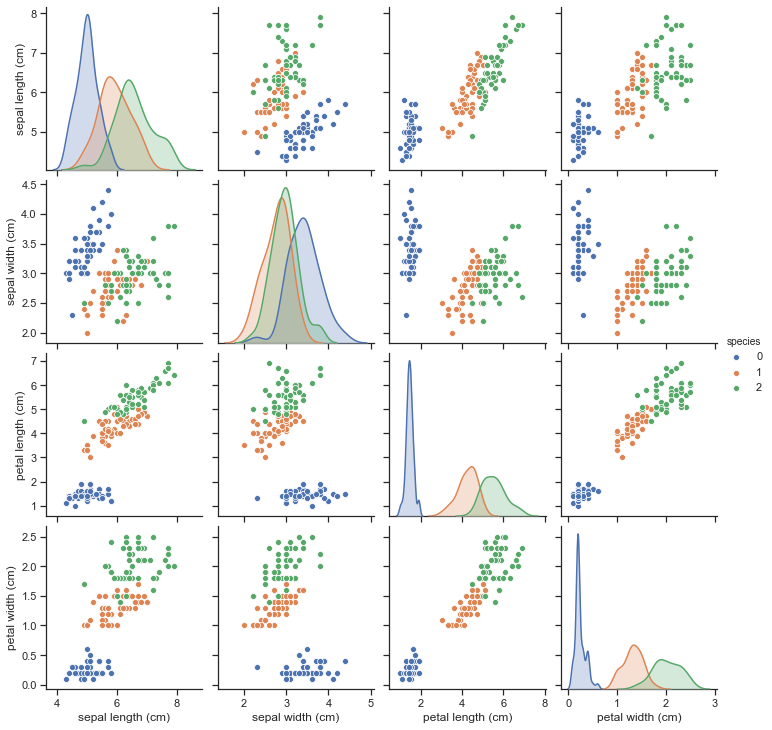

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


In [2]:
# define plotting function

def plotgrid(X, selected_features,size):
    fig = plt.figure(figsize=(size,size))
    for iRows in range(0,len(selected_features)): 
           for iColumns in range(0,len(selected_features)):
                ax = plt.subplot2grid((len(selected_features),len(selected_features)),(iRows, iColumns))
                if iRows == iColumns:
                    ax.hist(X[:, iRows])
                else:
                    ax.scatter(X[:, iRows], X[:, iColumns], c=y, cmap=plt.cm.Paired)
                    ax.set_xlabel(selected_features[iRows])
                    ax.set_ylabel(selected_features[iColumns])

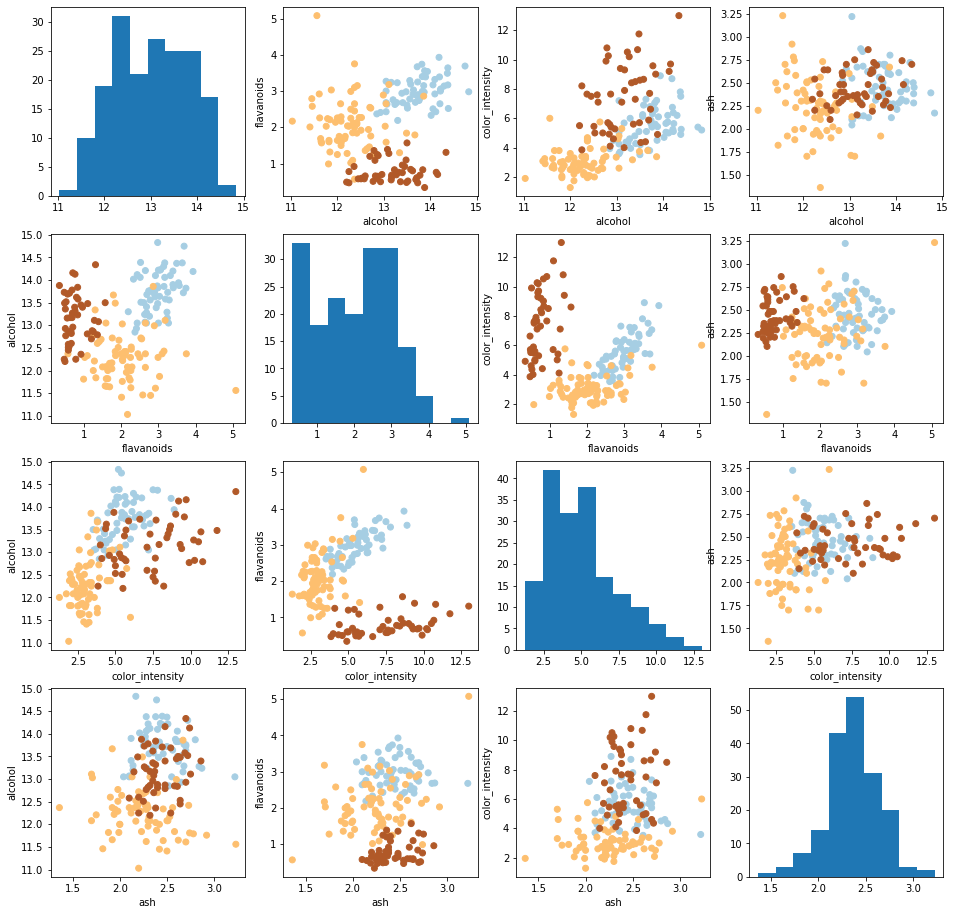

In [3]:
# run the plotting function
plotgrid(X, selected_features, 16)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

In [4]:
# noise code 
mySeed = 12345 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.5,X.shape)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer:
    
    I would choose color intensity and flavanoids.
    If we look in the plotgrid, we can see that the datapoints of color intensity and flavanoids are placed in to 3 separated groups, unlike others combination. Hence it is easier for the classifier algorithm do predict the datapoint


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


Answer:

    The shape of those histograms are less skewed, which is the result of Gaussian Distribution. And we can see that for the combination of color intensity and flavanoids , we would have to change the hyperparameters (increaase K, since KNN is sensitive to noise) to improve the accuracy since the datapoints of the 3 groups mixed up.

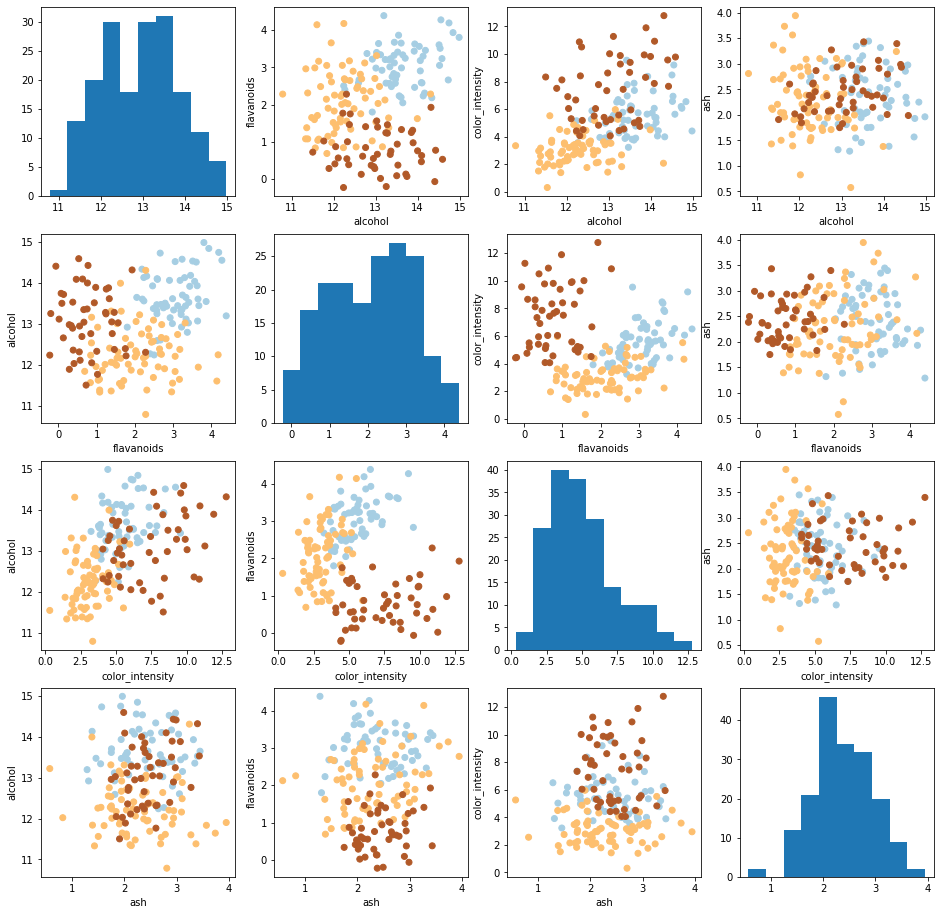

In [5]:
plotgrid(XN, selected_features, 16)

## 2. Implementing kNN [6 pts]

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [6]:
from numpy.random import randint
#Train split

data_len = len(y)
train_idx = xxx = randint(0,data_len,int(0.7*(data_len)))
X_train = X[train_idx]
y_train = y[train_idx]
 
#Test split
test_idx = xxx = randint(0,data_len,int(0.3*(data_len))) 
X_test = X[test_idx]
y_test = y[test_idx]



In [7]:
# helper code

#Calculate Distance:

#Manhattan distance

def manhattan_distance(p, q):
    distance = 0
    for p_i,q_i in zip(p,q):
        distance += abs(p_i - q_i)
    
    return distance


#Euclidean distance

def euclidean_distance(p,q):
    return np.linalg.norm(p -q)

In [8]:
# mykNN code


def knn_fit(X_train, X_test, y_train, k, dist):
    from scipy.stats import mode               #I could not find other method except mode from scipy :(


    group = []
    
    #loop through the X_test
    for i in X_test:                                          
        distances = []
       #loop through the index of the X_train 
        for j in range(len(X_train)):
           
        
            #Calculate distance between X_train and X_test
            
            if dist =='euclidean':
                L1_dist = manhattan_distance(X_train[j,:], i)
                distances.append(L1_dist)
                
            if dist == 'manhattan':
                L2_dist = euclidean_distance(X_train[j,:], i)
                distances.append(L2_dist)
            
            
            
        distances = np.array(distances)
        
        #Sort the distance
        distances_sorted = distances.argsort()[:k]
        #Return k nearest neighbor
        nearest = y_train[distances_sorted]
        #Return the most frequence neighbor, major voting
        family = mode(nearest) 
        
        family = family.mode[0]
        #Store to the list
        group.append(family)
        
        y_pred = np.array(group)
    
    return y_pred


In [9]:
#Test the KNN
y_pr = knn_fit(X_train, X_test, y_train, 5, 'manhattan')
y_pr

array([0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 2, 1, 1,
       0, 0, 1, 2, 0, 1, 0, 0, 1])

## 3. Classifier evaluation [3 pts]

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


In [10]:
# confusion matrix, accuracy, precision, recall, etc. 
def confusion_matrix(y_true, y_predict):
    C = len(np.unique(y_true))
    matrix = np.zeros((C, C))
    for i in range(0,len(y_predict)):
            matrix[y_true[i],y_predict[i]]+=1
    return matrix

# accuracy
def accuracy(y_true,y_predict):
    
    true = np.where(y_true==y_predict, 1, 0 )
    total_y_true = len(y_true)
    
    return sum(true)/total_y_true

# precision
def precision(y_true,y_predict):
    group = np.unique(y_true)
    precision = np.zeros(group.shape) 
    
    C = confusion_matrix(y_true, y_predict)
              
    for i in group:
        precision[i] = C[i,i] / sum(C[:,i])
        
    return precision

# recall
def recall(y_true,y_predict):
    group = np.unique(y_predict)
    recall = np.zeros(group.shape) 
    
    C = confusion_matrix(y_true, y_predict)
              
    for i in group:
        recall[i] = C[i,i] / sum(C[i,:])
    
    return recall

In [11]:
confusion_matrix(y_test, y_pr), accuracy(y_test, y_pr), precision(y_test,y_pr), recall(y_test,y_pr)

(array([[20.,  0.,  0.],
        [ 1., 21.,  2.],
        [ 0.,  1.,  8.]]),
 0.9245283018867925,
 array([0.95238095, 0.95454545, 0.8       ]),
 array([1.        , 0.875     , 0.88888889]))

In [12]:
# test evaluation code

#Import libraries
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score, recall_score 

#Result
print(cm(y_test, y_pr))
print(acc(y_test, y_pr))
print(precision_score(y_test,y_pr,average = None)) 
print(recall_score(y_test,y_pr,average = None))

[[20  0  0]
 [ 1 21  2]
 [ 0  1  8]]
0.9245283018867925
[0.95238095 0.95454545 0.8       ]
[1.         0.875      0.88888889]



## 4. Nested Cross-validation using your implementation of KNN  [6 pts]

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


In [13]:
def nestcv5Folds(X,y,z):
    # parameters for testing code
    nFolds = 5
    np.random.seed(z)
    # Creates an array of random permutation of indices between 0 and the length of the X data.
    # The indices are then split up into (folds) folds
    indices = np.random.permutation(np.arange(0,len(X),1))
    indices = np.array_split(indices, nFolds)
    #Create list to store values
    fold = []
    Accuracy = []
    Number_of_k = []
    Distance = []
    table = { 'Fold': fold,
             'Accuracy': Accuracy,
             'K': Number_of_k,
             'Distance': Distance}
    #Loop through each fold
    for iFold in range(0,nFolds):
        testFold = indices[iFold]
        remaining_folds = np.delete(range(0,nFolds), iFold)
        validationFold = indices[ remaining_folds[0] ]
        #loop through the number of k neighbor
        for k in range(1,11) :
            #loop through type of distance
            for dist in ('manhattan', 'euclidean'):
                
                #apply knn
                y_pre = knn_fit(X[testFold], X[validationFold], y[testFold], k,dist)
                
                #Accuracy Score
                acc_score= accuracy(y[validationFold], y_pre)
                
                #Confusion maxtrix
                con_mat = confusion_matrix(y[validationFold], y_pre)
                
                #Store the value to the dictionary
                Accuracy.append(acc_score)
                Distance.append(dist)
                Number_of_k.append(k)
                fold.append(iFold+1)
               
                #turn dictionary to dataframe
                data = pd.DataFrame(table)
   
    #Seperate each fold
    Fold1 = data.loc[data['Fold']== 1]
    Fold2 = data.loc[data['Fold']== 2]
    Fold3 = data.loc[data['Fold']== 3]
    Fold4 = data.loc[data['Fold']== 4]
    Fold5 = data.loc[data['Fold']== 5]
   
    #Find the highest accuracy in each folds
    Fold1_max = np.array(data.iloc[Fold1['Accuracy'].idxmax(),:])
    Fold2_max = np.array(data.iloc[Fold2['Accuracy'].idxmax(),:])
    Fold3_max = np.array(data.iloc[Fold3['Accuracy'].idxmax(),:])
    Fold4_max = np.array(data.iloc[Fold4['Accuracy'].idxmax(),:])
    Fold5_max = np.array(data.iloc[Fold5['Accuracy'].idxmax(),:])
    
    #Stack into list then turn to DataFrame, return DataFrame and ConfusionMaxtrix
    result= np.column_stack((Fold1_max, Fold2_max, Fold3_max, Fold4_max, Fold5_max))
    return pd.DataFrame(result, index = ['Fold', 'accuracy', 'k', 'distance']).T, con_mat

    My code is limited to 5 folds, and it takes so many step to take out the best accuracy for each folds. Moreover the accuracy score could be the same for each hyperparameter in each fold. Hence, my code is not optimised

In [14]:
# evaluate clean data code
df_clean, con_mat_clean = nestcv5Folds(X,y,999)
df_clean

,Fold,accuracy,k,distance
0,1,0.944444,5,euclidean
1,2,1.0,5,manhattan
2,3,1.0,6,manhattan
3,4,1.0,9,euclidean
4,5,1.0,3,manhattan


In [15]:
# evaluate noisy  data code
df_noise, con_mat_noise = nestcv5Folds(XN,y,999)
df_noise

,Fold,accuracy,k,distance
0,1,0.944444,1,manhattan
1,2,1.0,1,manhattan
2,3,1.0,1,manhattan
3,4,0.944444,5,euclidean
4,5,1.0,7,euclidean


## 5. Summary of results [6 pts]

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |nestcv5Folds(X,y,999)
| **total** | .? $\pm$ ? |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [16]:
# clean data summary results
df_clean, con_mat_clean = nestcv5Folds(X,y,999)
print('CLEAN', con_mat_clean)


# clean data summary results
df_noise, con_mat_noise = nestcv5Folds(XN,y,999)
print('NOISE',con_mat_noise)

CLEAN [[10.  0.  0.]
 [ 0. 20.  0.]
 [ 0.  0.  6.]]
NOISE [[10.  0.  0.]
 [ 0. 20.  0.]
 [ 0.  0.  6.]]


## 6. More questions [9 pts]

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer:

    Yes, the hyperparameter change when noise is added to the data since one of the weakness of KNN is it is sensitive with noise, especially when K is low.
    
    We cannot say that one hyperparameter choice is better regardless of the data used, it may depend on the number of target and how the data being plot (depend on the data).

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer: 


    We could assign the weighted distance. For example, if K = 2, and one of the neighbours is 1 and the other is 2, then if we assign weighted distance, the algorithm will break the tie by choosing the nearer neighbor.

    The problem is not fix to k = even number, it also depends on the number of target. If the number of target is 3, then k = 3 is also a problem.



### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer: 

    Firstly, my code can have a tie break problem in question 4, so I need to assign weighted distance to my code. 

    Secondly, my code did not re-scale the data so it will be a problem when it applies to any kind of dataset. But I can overcome that by normalised my own data from the DataFrame (domain[0;1]), using Minmax Scale or StandardScaler from Scikit
